# Part I - Ford GoBike System Data
## by Elaine Acaba Torres

## Introduction
> My chosen data was Ford GoBike System Data. This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in 2019.


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

## Assesing

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [6]:
df.shape

(183412, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [11]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
105552,217,2019-02-13 23:33:00.8390,2019-02-13 23:36:38.5090,369.0,Hyde St at Post St,37.787349,-122.416651,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,6585,Subscriber,1975.0,Male,No
7657,741,2019-02-28 08:50:05.7400,2019-02-28 09:02:27.3770,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1994.0,Male,No
154377,275,2019-02-06 09:56:22.3050,2019-02-06 10:00:57.7880,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,4645,Subscriber,1999.0,Male,Yes
13056,247,2019-02-27 17:00:42.9100,2019-02-27 17:04:50.5420,50.0,2nd St at Townsend St,37.780526,-122.390288,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,4613,Subscriber,NaN,NaN,No
134435,1318,2019-02-08 17:11:15.2600,2019-02-08 17:33:13.9430,129.0,Harrison St at 20th St,37.758862,-122.412544,133.0,Valencia St at 22nd St,37.755213,-122.420975,1685,Subscriber,1958.0,Male,No


In [12]:
# Create a copy of the dataset

gobike1 = df.copy()

## Quality Issues

1. Change duration in seconds to minute and hours
2. Separate start_time and end_time
3. Get the month and day from start_date and end_date columns
4. Create column for morning, afternoon and evening
5. Create column for day of the week name
6. Create column for weekday and weekend
7. Convert period day and weekday into categorical types
8. Convert user_type and member_gender column as categorical types

## Clean

### 1. Change duration in seconds to minute and hours

In [13]:
gobike1['duration_min']= gobike1['duration_sec']/60
gobike1['duration_hr']= gobike1['duration_min']/60

gobike1['duration_min']= gobike1['duration_min'].astype(float)
gobike1['duration_hr']= gobike1['duration_hr'].astype(float)
gobike1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hr
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,14.495833
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333,11.811389
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,17.181667
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667,10.136111
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,0.440278


### 2. Separate start_time and end_time 

In [14]:
# Copy of previous dataset
gobike2 = gobike1.copy()

In [15]:
# Separate start_time 
gobike2['start_date']= pd.to_datetime(gobike2['start_time']).dt.date
gobike2['start_time']= pd.to_datetime(gobike2['start_time']).dt.time

In [16]:
gobike2.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hr,start_date
0,52185,17:32:10.145000,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,14.495833,2019-02-28
1,42521,18:53:21.789000,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333,11.811389,2019-02-28


In [17]:
# Separate end_time
gobike2['end_date']= pd.to_datetime(gobike2['end_time']).dt.date
gobike2['end_time']= pd.to_datetime(gobike2['end_time']).dt.time
gobike2.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hr,start_date,end_date
0,52185,17:32:10.145000,08:01:55.975000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,14.495833,2019-02-28,2019-03-01
1,42521,18:53:21.789000,06:42:03.056000,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333,11.811389,2019-02-28,2019-03-01


### 3. Get the month and day from start_date and end_date columns


In [18]:
gobike2['start_dt']= pd.to_datetime(gobike2['start_date'], format= '%Y-%m-%d')
gobike2['day']= gobike2['start_dt'].apply(lambda r:r.day).astype(int)
gobike2['month']= gobike2['start_dt'].apply(lambda r:r.month).astype(int)
gobike2.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hr,start_date,end_date,start_dt,day,month
0,52185,17:32:10.145000,08:01:55.975000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,869.750000,14.495833,2019-02-28,2019-03-01,2019-02-28,28,2
1,42521,18:53:21.789000,06:42:03.056000,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,NaN,No,708.683333,11.811389,2019-02-28,2019-03-01,2019-02-28,28,2


### 4. Create column for morning, afternoon and evening

In [19]:
# Create copy of previous dataset
gobike3 = gobike2.copy()

In [20]:
gobike3['start_hour']= gobike3['start_time'].apply(lambda time:time.hour)
gobike3['period_day']= 'morning'
gobike3['period_day'][(gobike3['start_hour']>= 12) & (gobike3['start_hour']<= 17)] = 'afternoon'
gobike3['period_day'][(gobike3['start_hour']>= 18) & (gobike3['start_hour']<= 23)] = 'evening'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [21]:
gobike3.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,duration_min,duration_hr,start_date,end_date,start_dt,day,month,start_hour,period_day
0,52185,17:32:10.145000,08:01:55.975000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,No,869.750000,14.495833,2019-02-28,2019-03-01,2019-02-28,28,2,17,afternoon
1,42521,18:53:21.789000,06:42:03.056000,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,No,708.683333,11.811389,2019-02-28,2019-03-01,2019-02-28,28,2,18,evening
2,61854,12:13:13.218000,05:24:08.146000,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,No,1030.900000,17.181667,2019-02-28,2019-03-01,2019-02-28,28,2,12,afternoon
3,36490,17:54:26.010000,04:02:36.842000,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,No,608.166667,10.136111,2019-02-28,2019-03-01,2019-02-28,28,2,17,afternoon
4,1585,23:54:18.549000,00:20:44.074000,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Yes,26.416667,0.440278,2019-02-28,2019-03-01,2019-02-28,28,2,23,evening


In [22]:
gobike3['start_hour'].value_counts().sort_values()

3       174
4       235
2       381
1       548
5       896
0       925
23     1646
22     2916
6      3485
21     4561
20     6482
11     7884
14     8152
10     8364
13     8551
12     8724
15     9174
19     9881
7     10614
16    14169
9     15903
18    16827
8     21056
17    21864
Name: start_hour, dtype: int64

In [23]:
gobike3['period_day'].value_counts()

afternoon    70634
morning      70465
evening      42313
Name: period_day, dtype: int64

### 5. Create column for day of the week name

In [24]:
## Create column for day of the week name
gobike3['start_weekday_num']= gobike3['start_dt'].apply(lambda time:time.dayofweek)
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
gobike3['start_weekday_char']= gobike3['start_weekday_num'].map(dmap)

In [25]:
gobike3.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,duration_hr,start_date,end_date,start_dt,day,month,start_hour,period_day,start_weekday_num,start_weekday_char
28292,1116,08:38:00.750000,08:56:37.187000,369.0,Hyde St at Post St,37.787349,-122.416651,14.0,Clay St at Battery St,37.795001,...,0.310000,2019-02-25,2019-02-25,2019-02-25,25,2,8,morning,0,Mon
92947,282,18:14:53.107000,18:19:35.116000,315.0,Market St at 45th St,37.834174,-122.272968,152.0,47th St at San Pablo Ave,37.835632,...,0.078333,2019-02-15,2019-02-15,2019-02-15,15,2,18,evening,4,Fri
42171,565,17:46:15.928000,17:55:41.170000,66.0,3rd St at Townsend St,37.778742,-122.392741,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,0.156944,2019-02-22,2019-02-22,2019-02-22,22,2,17,afternoon,4,Fri


In [26]:
gobike3['start_weekday_char'].value_counts()

Thu    35197
Tue    31813
Wed    29641
Fri    28981
Mon    26852
Sun    15523
Sat    15405
Name: start_weekday_char, dtype: int64

### 6. Create column for weekday and weekend

In [27]:
gobike3['start_time_type'] = gobike3.start_dt.dt.weekday.apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
gobike3.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_date,end_date,start_dt,day,month,start_hour,period_day,start_weekday_num,start_weekday_char,start_time_type
115795,639,08:21:51.215000,08:32:30.605000,266.0,Parker St at Fulton St,37.862464,-122.264791,255.0,Virginia St at Shattuck Ave,37.876573,...,2019-02-12,2019-02-12,2019-02-12,12,2,8,morning,1,Tue,Weekday
24698,433,17:53:55.060000,18:01:08.269000,88.0,11th St at Bryant St,37.770030,-122.411726,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,2019-02-25,2019-02-25,2019-02-25,25,2,17,afternoon,0,Mon,Weekday
159836,788,17:32:06.101000,17:45:14.238000,60.0,8th St at Ringold St,37.774520,-122.409449,124.0,19th St at Florida St,37.760447,...,2019-02-05,2019-02-05,2019-02-05,5,2,17,afternoon,1,Tue,Weekday


### 7. Convert period day and weekday into categorical types

In [28]:
category_type_dict = {'period_day': ['morning', 'afternoon', 'evening'],
              'start_weekday_char': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for x in category_type_dict:
    category_type = pd.api.types.CategoricalDtype(ordered = True, categories= category_type_dict[x])
    
    gobike3[x] = gobike3[x].astype(category_type)

In [29]:
gobike3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 28 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
duration_min               183412 non-null float64
duration_hr                183412

### 8. Convert user_type and member_gender column as categorical types

In [30]:
# Copy of previous dataset
gobike4 = gobike3.copy()

In [31]:
gobike4['user_type'] = gobike4['user_type'].astype('category')
gobike4['member_gender'] = gobike4['member_gender'].astype('category')
gobike4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 28 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null object
duration_min               183412 non-null float64
duration_hr                18

In [32]:
gobike4['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [33]:
gobike4['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [34]:
# Copy of previous dataset to start the Exploration

gobike_clean = gobike4.copy()

In [35]:
gobike_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'duration_min', 'duration_hr', 'start_date', 'end_date', 'start_dt',
       'day', 'month', 'start_hour', 'period_day', 'start_weekday_num',
       'start_weekday_char', 'start_time_type'],
      dtype='object')

In [36]:
# Create final dataframe

colmns = ['duration_sec', 'start_time', 'end_time', 'user_type',
       'member_birth_year', 'member_gender',
       'duration_min', 'duration_hr', 'start_dt', 'end_date',
       'day', 'month', 'start_hour', 'period_day', 'start_weekday_num',
       'start_weekday_char', 'start_time_type']
gobike_archive1 = gobike_clean[colmns]
gobike_archive1.head()

,duration_sec,start_time,end_time,user_type,member_birth_year,member_gender,duration_min,duration_hr,start_dt,end_date,day,month,start_hour,period_day,start_weekday_num,start_weekday_char,start_time_type
0,52185,17:32:10.145000,08:01:55.975000,Customer,1984.0,Male,869.750000,14.495833,2019-02-28,2019-03-01,28,2,17,afternoon,3,Thu,Weekday
1,42521,18:53:21.789000,06:42:03.056000,Customer,NaN,NaN,708.683333,11.811389,2019-02-28,2019-03-01,28,2,18,evening,3,Thu,Weekday
2,61854,12:13:13.218000,05:24:08.146000,Customer,1972.0,Male,1030.900000,17.181667,2019-02-28,2019-03-01,28,2,12,afternoon,3,Thu,Weekday
3,36490,17:54:26.010000,04:02:36.842000,Subscriber,1989.0,Other,608.166667,10.136111,2019-02-28,2019-03-01,28,2,17,afternoon,3,Thu,Weekday
4,1585,23:54:18.549000,00:20:44.074000,Subscriber,1974.0,Male,26.416667,0.440278,2019-02-28,2019-03-01,28,2,23,evening,3,Thu,Weekday


In [37]:
gobike_archive1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec          183412 non-null int64
start_time            183412 non-null object
end_time              183412 non-null object
user_type             183412 non-null category
member_birth_year     175147 non-null float64
member_gender         175147 non-null category
duration_min          183412 non-null float64
duration_hr           183412 non-null float64
start_dt              183412 non-null datetime64[ns]
end_date              183412 non-null object
day                   183412 non-null int64
month                 183412 non-null int64
start_hour            183412 non-null int64
period_day            183412 non-null category
start_weekday_num     183412 non-null int64
start_weekday_char    183412 non-null category
start_time_type       183412 non-null object
dtypes: category(4), datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 18.9+ MB


### What is the structure of your dataset?

> This dataset contain 183412 bike rides and 17 columns. Created a last dataframe with the columns to explore and ended with category(4), datetime64(1), float64(3), int64(5), object(4)


### What is/are the main feature(s) of interest in your dataset?

> My interest is to verify what factors influence on the bike rides

> What is the most popular time, day, period of day

> What is the gender and user type using the service 

> When are most trips taken in terms of time of day or day of the week?



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Week day, period day, duration, gender, user type, age

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.



In [80]:
gobike_archive1.start_weekday_char.value_counts()

Thu    35197
Tue    31813
Wed    29641
Fri    28981
Mon    26852
Sun    15523
Sat    15405
Name: start_weekday_char, dtype: int64

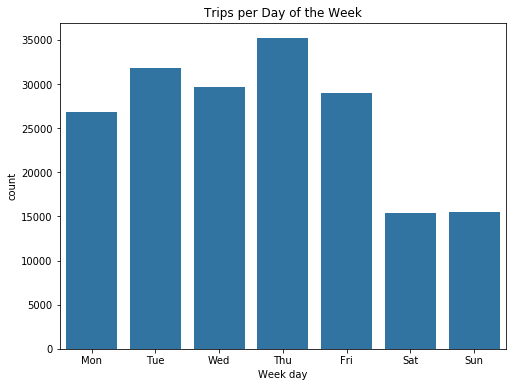

In [38]:
# What is the most popular day of the week?
base_color = sb.color_palette()[0] 

plt.figure(figsize = [8,6])
sb.countplot(data= gobike_archive1, x='start_weekday_char', color=base_color)
plt.xlabel('Week day')
plt.title('Trips per Day of the Week');

> The most popular day of the week is Thursday with 35000 riders. This is followed by Tuesday with approximately 31000 riders. We can observe the opposite if this question, as the least popular day are Saturday and Sundays. 

In [39]:
# Trips between Weekday and Weekend
weekday = len(gobike_archive1[gobike_clean['start_time_type'] == 'Weekday'])
weekend = len(gobike_archive1[gobike_clean['start_time_type'] != 'Weekday'])


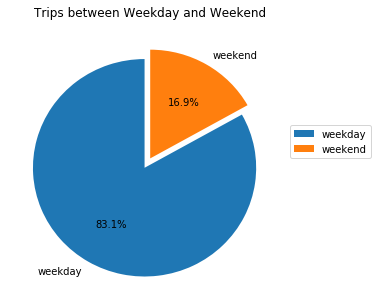

In [40]:
# Whats the most busiest between weekdays and weekends?
plt.figure(figsize = [5,5])
x_labels = ['weekday', 'weekend']
y = [weekday, weekend]
explode = (0.1, 0)
plt.pie(y, labels = x_labels, explode = explode, startangle=90, autopct='%1.1f%%')
plt.legend (labels = x_labels, loc = (1, 0.5))
plt.title('Trips between Weekday and Weekend');

> With the previous plot, we can observe that weekdays are the busiest with a 83.1% of the riders compared to weekend riders with 16.9%.

In [41]:
# Difference in trips between periods
gobike_archive1.period_day.value_counts()

afternoon    70634
morning      70465
evening      42313
Name: period_day, dtype: int64

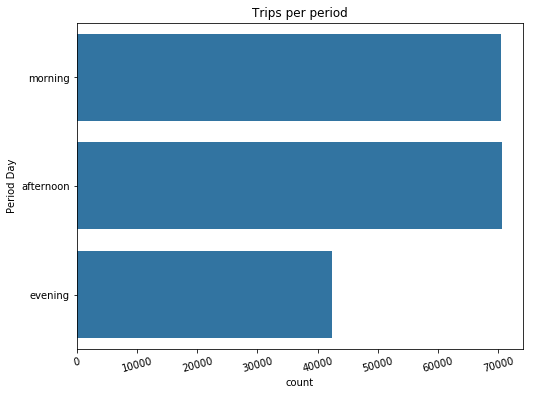

In [42]:
# Whats the most popular period of the day for riders?
base_color = sb.color_palette()[0]

plt.figure(figsize = [8,6])
sb.countplot(data = gobike_archive1, y = 'period_day', color = base_color)
plt.xticks(rotation = 15)
plt.ylabel('Period Day')
plt.title('Trips per period');


> We can see in the previous plots that weekdays are when the bikes are used the most. This may cause the riders to believe that this is more of a transportation service since they are working on weekdays. We can see that morning and afternoons are the most popular times for riders going to work or leaving work, compared to night riders. 

In [43]:
# Check the scope of duration in minutes to select the bins size 
gobike_archive1.duration_min.min(), gobike_archive1.duration_min.max()


(1.0166666666666666, 1424.0666666666666)

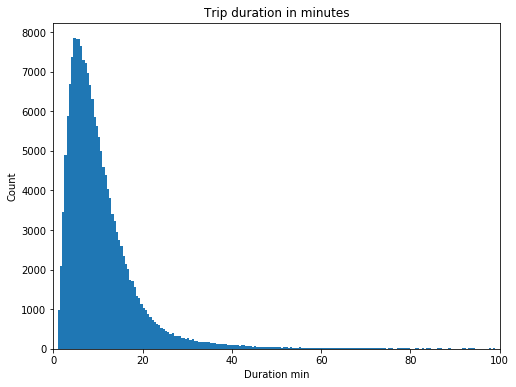

In [68]:
# Whats the trip duration or riders in minutes?
# Create plot of duration of every trip in minutes
binsize = 0.5
bins = np.arange(0, gobike_archive1['duration_min'].max() + binsize, binsize)

plt.figure(figsize = [8,6])
plt.hist(data = gobike_archive1, x = 'duration_min', bins = bins)
plt.xlim((0,100))
plt.xlabel('Duration min')
plt.ylabel('Count')
plt.title('Trip duration in minutes');


> The trip duration of riders are approximately 30 minutes or less. 

In [45]:
gobike_archive1.duration_min.mean()

12.101307257249619

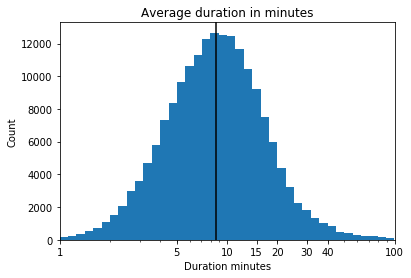

In [69]:
# log scale plot to get the average duration in minutes
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(gobike_archive1['duration_min'].max()) + log_binsize, log_binsize)

plt.hist(data = gobike_archive1, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1, 5, 10, 15, 20, 30, 40, 100], [1, 5, 10, 15, 20, 30, 40, 100])
plt.xlim((1, 100))
plt.xlabel('Duration minutes')
plt.ylabel('Count')
plt.title('Average duration in minutes')
plt.axvline(x = gobike_archive1.duration_min.median(), color = 'black');

> We observe a right-skewed distribution of trip duration in minutes, with the average duration being approximately 10 minutes. Given that the data contains a large number of outliers, the mean would decrease from 12.10 minutes to 10 minutes, as shown in the previous plot.

In [81]:
# Whats the busiest hours of day?
gobike_archive1.start_hour.unique()

array([17, 18, 12, 23, 22, 21, 20, 19, 15, 10, 16,  9, 11,  0, 13, 14,  8,
        7,  5,  6,  4,  3,  2,  1])

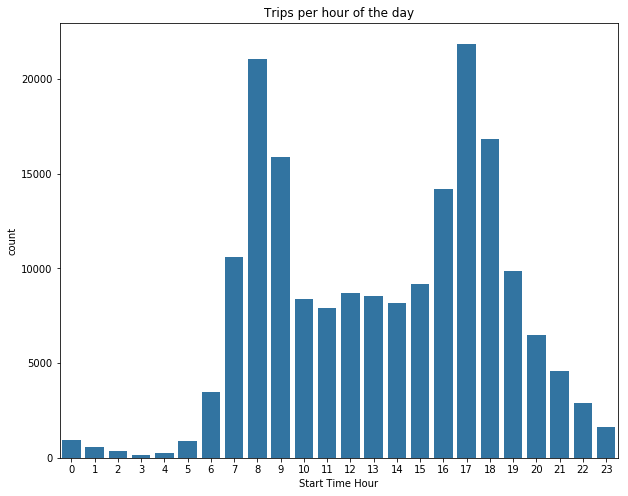

In [48]:
plt.figure(figsize = [10,8])
sb.countplot(data= gobike_archive1, x='start_hour', color=base_color)
plt.xlabel('Start Time Hour')
plt.title('Trips per hour of the day');

> We can see two concentrated hours creating a bimodal distribution. The most frequent hours are 8-10h AM (morning) and 17-19h (transition between afternoon and evening), confirming the previous plots of riders using the service for transportation before and after work.

In [49]:
# How does the type of user affect the bike's usage?
gobike_archive1.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

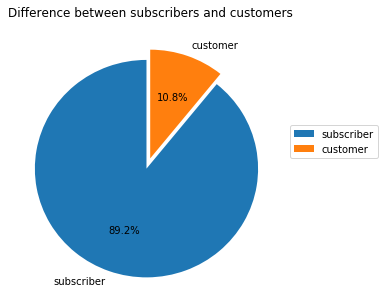

In [50]:
# Whats the difference between subscribers and customers in percentage?
subscriber = len(gobike_archive1[gobike_archive1['user_type'] == 'Subscriber'])
customer = len(gobike_archive1[gobike_archive1['user_type'] != 'Subscriber'])

fig = plt.figure(figsize = (5, 5))
x_labels = ['subscriber', 'customer']
y = [subscriber, customer]
explode = (0.1, 0)
plt.pie(y, labels = x_labels, explode = explode, startangle=90, autopct='%1.1f%%')
plt.legend (labels = x_labels, loc = (1, 0.5))
plt.title('Difference between subscribers and customers');

> Subscribers are the 89.2% user type of this service compared to customers, which compose about 10.8%. 

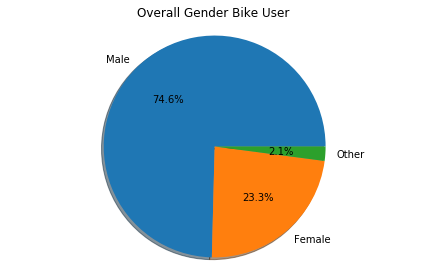

In [51]:
# Whats the gender bike user?
fig = plt.figure(figsize = (16, 10))

ax1 = fig.add_subplot(221)
gobike_archive1.member_gender.value_counts().plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, ax = ax1)
ax1.axis('equal')
ax1.set(ylabel = '', title = 'Overall Gender Bike User');

> In the previous plot, 75% of the bike users are male and only 23% of users are female. Theres a small amount of users under 'other' in the plot that could be due to missing information/prefer not to say.

In [52]:
# Create a copy to add a column for member age

gobike_age1 = gobike_archive1.copy()

In [53]:
gobike_age1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec          183412 non-null int64
start_time            183412 non-null object
end_time              183412 non-null object
user_type             183412 non-null category
member_birth_year     175147 non-null float64
member_gender         175147 non-null category
duration_min          183412 non-null float64
duration_hr           183412 non-null float64
start_dt              183412 non-null datetime64[ns]
end_date              183412 non-null object
day                   183412 non-null int64
month                 183412 non-null int64
start_hour            183412 non-null int64
period_day            183412 non-null category
start_weekday_num     183412 non-null int64
start_weekday_char    183412 non-null category
start_time_type       183412 non-null object
dtypes: category(4), datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 18.9+ MB


In [54]:
# calculate the age of the customer
gobike_age1['member_birth_year'] = 2019 - gobike_age1['member_birth_year']

# rename the column to member age
gobike_age1.rename(columns = {'member_birth_year': 'member_age'}, inplace = True)

In [55]:
gobike_age1.member_age.value_counts().sort_values()

141.0        1
89.0         1
109.0        1
91.0         1
92.0         1
75.0         2
85.0         2
99.0         3
81.0         3
118.0        6
78.0         9
80.0        11
117.0       11
73.0        19
86.0        20
77.0        21
76.0        30
18.0        34
71.0        51
119.0       53
88.0        89
70.0        99
74.0       105
64.0       134
72.0       135
66.0       158
69.0       178
68.0       180
67.0       189
65.0       301
         ...  
47.0      1909
48.0      1924
51.0      1928
46.0      2080
43.0      2442
44.0      2503
20.0      2528
45.0      2633
42.0      2725
41.0      2830
21.0      3208
22.0      3481
40.0      3756
38.0      4345
23.0      4640
37.0      4990
39.0      5024
36.0      5954
35.0      6562
34.0      7028
24.0      7423
25.0      7660
33.0      7973
32.0      8018
27.0      8250
28.0      8498
29.0      8658
30.0      8972
26.0      9325
31.0     10236
Name: member_age, Length: 75, dtype: int64

In [56]:
gobike_age1.member_age.value_counts(normalize=True)

31.0     0.058442
26.0     0.053241
30.0     0.051226
29.0     0.049433
28.0     0.048519
27.0     0.047103
32.0     0.045779
33.0     0.045522
25.0     0.043735
24.0     0.042382
34.0     0.040126
35.0     0.037466
36.0     0.033994
39.0     0.028684
37.0     0.028490
23.0     0.026492
38.0     0.024808
40.0     0.021445
22.0     0.019875
21.0     0.018316
41.0     0.016158
42.0     0.015558
45.0     0.015033
20.0     0.014434
44.0     0.014291
43.0     0.013943
46.0     0.011876
51.0     0.011008
48.0     0.010985
47.0     0.010899
           ...   
65.0     0.001719
67.0     0.001079
68.0     0.001028
69.0     0.001016
66.0     0.000902
72.0     0.000771
64.0     0.000765
74.0     0.000599
70.0     0.000565
88.0     0.000508
119.0    0.000303
71.0     0.000291
18.0     0.000194
76.0     0.000171
77.0     0.000120
86.0     0.000114
73.0     0.000108
117.0    0.000063
80.0     0.000063
78.0     0.000051
118.0    0.000034
81.0     0.000017
99.0     0.000017
85.0     0.000011
75.0     0

Text(0.5,1,"User's Age")

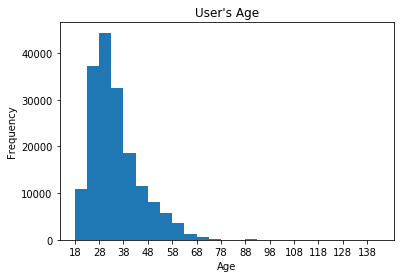

In [70]:
# Whats the user's age?
bins = np.arange(gobike_age1.member_age.min(), gobike_age1.member_age.max() + 5, 5)
xticks = bins[list(range(0, len(bins), 2))]
gobike_age1.member_age.plot(kind = 'hist', bins = bins,xticks = xticks)
plt.xlabel('Age')
plt.title("User's Age")

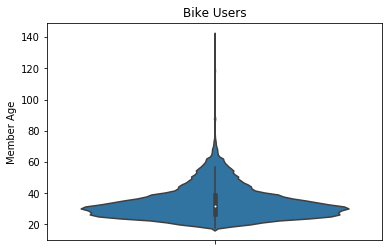

In [71]:
# plot a violinplot for members age
sb.violinplot(data = gobike_age1, y = 'member_age')
plt.title('Bike Users') 
plt.ylabel('Member Age');

> Looking at the 4 previous plots, subscribers are the type of users for rides. This could be because they get a membership deal or the need to use another means of transport. We can note that overall, males are the the top gender with 74.6% compared to the usage of bikes by females. Specifically, used by age between 25 - 38 with a peak of 31 years old. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I did need to create a member age to create the gender usage.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Something unsual was to find that there was some data for bike rides above 89 years old to 141. This could mean that the user typed the wrong age creating some outliers in the data. Because the amount was so small, this was not changed as it would not affect the exploration. 

# Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

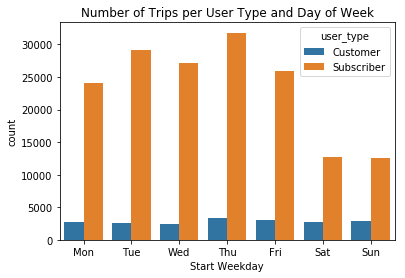

In [72]:
# Whats the user_type number of trips per day of week?
sb.countplot(data = gobike_archive1, x = 'start_weekday_char', hue = 'user_type')
plt.xlabel('Start Weekday')
plt.title('Number of Trips per User Type and Day of Week');

> As previously mentioned, subscribers compose the majority of the users for bikes. And we can observe here that they normally uses the bikes on Thursdays and Tuesdays the most, with more than 25000 riders.

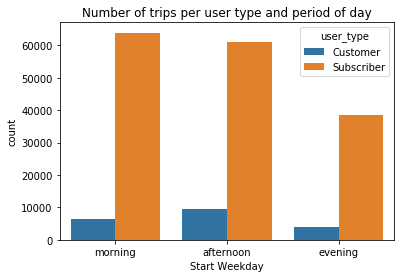

In [73]:
# Whats the user_type number of trips per period of day?
sb.countplot(data = gobike_archive1, x = 'period_day', hue = 'user_type')
plt.xlabel('Start Weekday')
plt.title('Number of trips per user type and period of day');

> We can see here a more in depth graphic where the subscribers uses the bikes mostly in the morning and the afternoon, reiterating the fact that they might use them for commuting. 

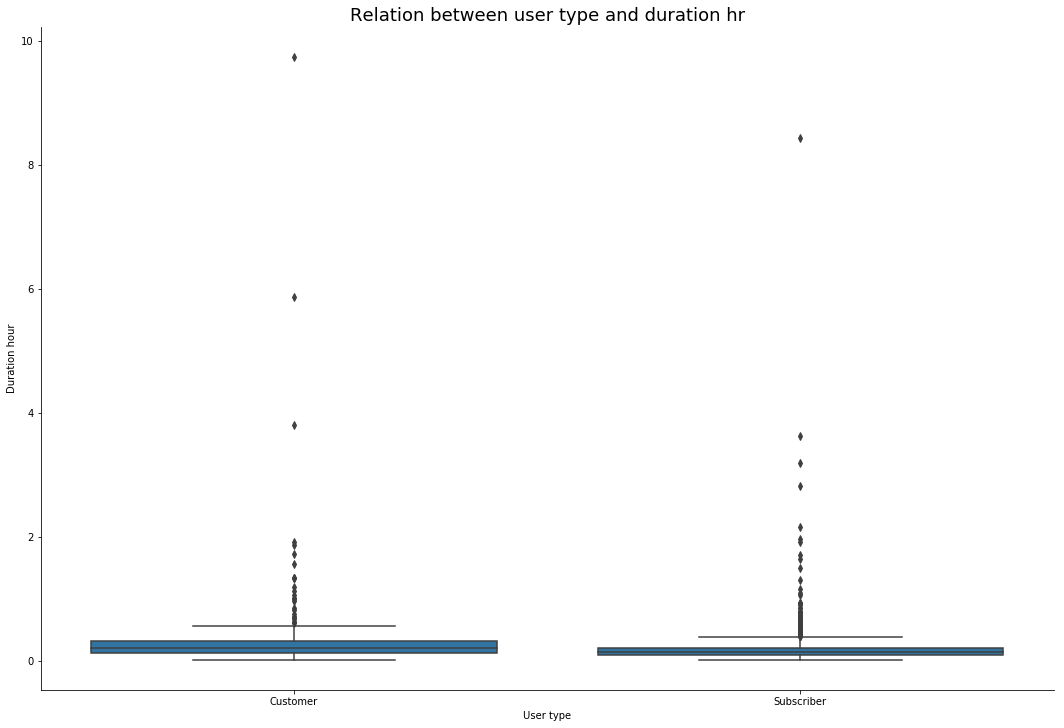

In [76]:
# Whats the relation between user type and duration in hour spent on the bike?
np.random.seed(2018)
samples = np.random.choice(gobike_archive1.shape[0], 2000, replace = False)
bike_clean_samp = gobike_archive1.reindex(samples)

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [5, 5])
g = sb.PairGrid(data = bike_clean_samp, y_vars = 'duration_hr', x_vars = 'user_type', size = 10, aspect = 1.5);
g.map(boxgrid)
plt.xlabel('User type')
plt.ylabel('Duration hour')
plt.title('Relation between user type and duration hr', fontsize= 18);

> We can note that in the 'Relation between user type and duration in hour spent on the bike' plot, 'customers' are the type of users speding more time using the service compared to 'subscribers'. This could be due to being on vacation or having more free time. However, its an interesting observation based on the plot

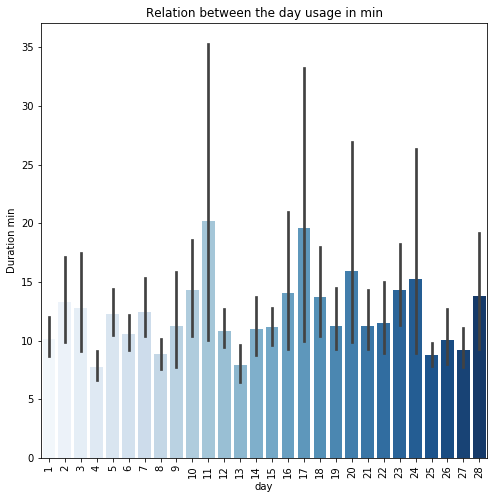

In [78]:
# Whats the relation between the day usage of bike in minutes?

plt.figure(figsize = [8, 8])
sb.barplot(data = bike_clean_samp, x = 'day', y = 'duration_min', palette = 'Blues')
plt.xticks(rotation=90)
plt.ylabel('Duration min')
plt.title('Relation between the day usage in min');

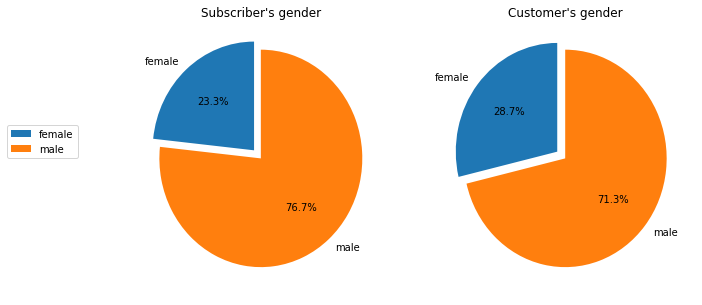

In [63]:
# Whats the gender differences between subscribers and customers?
# Gender in subscriber's users
plt.figure(figsize=[10,5])

plt.subplot(1, 2, 1)
female_sub = len(gobike_archive1[(gobike_archive1['user_type'] == 'Subscriber') & (gobike_archive1['member_gender'] == 'Female')])
male_sub = len(gobike_archive1[(gobike_archive1['user_type'] == 'Subscriber') & (gobike_archive1['member_gender'] == 'Male')])

x_labels = ['female', 'male']
y = [female_sub, male_sub]
explode = (0.1, 0)
plt.pie(y, labels = x_labels, explode = explode, startangle=90, autopct='%1.1f%%')
plt.legend (labels = x_labels, loc = (-0.5, 0.5))
plt.title('Subscriber\'s gender');

# Gender in customer's users
plt.subplot(1, 2, 2)
female_con = len(gobike_archive1[(gobike_archive1['user_type'] == 'Customer') & (gobike_archive1['member_gender'] == 'Female')])
male_con = len(gobike_archive1[(gobike_archive1['user_type'] == 'Customer') & (gobike_archive1['member_gender'] == 'Male')])

x_labels = ['female', 'male']
y = [female_con, male_con]
explode = (0.1, 0)
plt.pie(y, labels = x_labels, explode = explode, startangle=90, autopct='%1.1f%%')
plt.title('Customer\'s gender');

> More than 70% of the members are male in the two user types: subscribers and customers. Females compose less than 30% of this usage riders. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Its an interesting observation based on the plot. Also, reiterating the univariate plot for genders, we can note that males are still the popular gender between user types. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

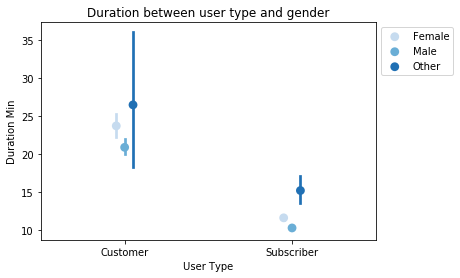

In [79]:
# Whats the duration in minutes per user type and gender?
plt.figure(figsize = (6, 4))

sb.pointplot(data = gobike_archive1, x = 'user_type', y = 'duration_min', hue = 'member_gender',
            palette = 'Blues', linestyles = '', dodge = 0.1)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('User Type')
plt.ylabel('Duration Min')
plt.title('Duration between user type and gender');

> We can observe that the gender user influcence in the duration in minutes per trip as we can see that females tends to use the service longer than males for both user types. 

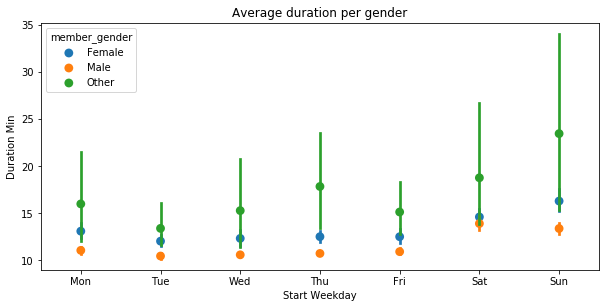

In [65]:
# Whats the average duration per gender and day of week?
plt.figure(figsize=[10,10])

plt.subplot(2, 1, 1)
sb.pointplot(data = gobike_archive1, x = 'start_weekday_char', y = 'duration_min', hue = 'member_gender', linestyles = "")
plt.xlabel('Start Weekday')
plt.ylabel('Duration Min')
plt.title('Average duration per gender');



> We can see here that again, females are the users with the longest trips. However, the difference is not by much when we look at a deeper level per week instead of overall. 

Text(0.5,1,'Average duration per user type')

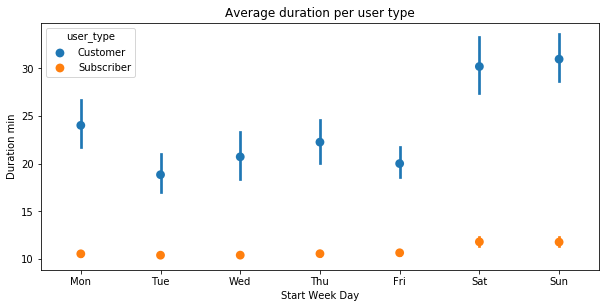

In [66]:
# Whats the average duration per user type and day of week?
plt.figure(figsize=[10,10])

plt.subplot(2, 1, 1)
sb.pointplot(data = gobike_archive1, x = 'start_weekday_char', y = 'duration_min', hue = 'user_type', linestyles = "")
plt.xlabel('Start Week Day')
plt.ylabel('Duration min')
plt.title('Average duration per user type')

> We can see here that the customers tend to use the bikes mostly on the weekends compares to the subscribers. This is very interesting because we have about 90% subscribers. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We can note by the previous plots that despite the males being the most popular gender using the service, females are the gender making the longest trips in both user types; customers and subscribers.

### Were there any interesting or surprising interactions between features?

> In the last plot, we can observe that customers are the user types using the services more over the weekend in duration minutes. 


## Conclusions


In this notebook, I investigated the Ford GoBike System Data. This dataset contained 183412 bike rides and 16 columns. In order to start the exploration, I had to assess and clean the data, creating a dataframe with the final columns to explore.

During the exploration, we can observe that males are the gender with the most bike rides between subscribers and customers. Nevertheless, females are the gender with the longest trips in duration minutes. 

On the univariate exploration, the plots demonstrate that weekdays are the times when the bikes are used the most. Making this service available to commuting consumers.

We can see that clearly in the hours when the customers use the bikes as well. Specifically in morning time, between 08h and 10h and after work, when customers are leaving to their home, between 17h and 19h. 

It was interesting to note that the average trip duration in minutes was about 10 minutes. As a result, the duration in minutes is shorter in comparison to the number of subscribers vs. customers.

As previously mentioned, subscribers are the typical ride-user. This can be due to a membership benefit or the requirement to use another mode of transportation. Overall, men use bicycles at a higher rate (74.6%) than women do. Used specifically by people between the ages of 25 and 28, with a peak at 31.


In [69]:
# Created dataset to csv for the part II
gobike_archive1.to_csv('gobike_archive1_FordGoBike2019', index = False, encoding = 'utf-8')